# Исследование объявлений о продаже квартир

Предоставлены данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.

Задача — установить параметры, которые позволят научиться определять рыночную стоимость объектов недвижимости, чтобы построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
Для выполнения этой задачи необходимо:
1. Изучить общую информацию об исходных данных
2. Предобработать данные: найдти и изучитт пропущенные значения в столбцах, рассмотреть типы данных в каждом столбце, изучить уникальные значения в столбце с названиями и устраните неявные дубликаты. 
3. Добавить в таблицу новые столбцы со следующими параметрами:
- цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).
4. Провести исследовательский анализ данных:
     
     1) изучить следующие параметры:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка.

    2) Изучить, как быстро продавались квартиры.
    
    3) Изучить, зависит ли общая (полная) стоимость объекта от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

    4) Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — построить сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.
    
    5)	Выделить квартиры в Санкт-Петербурге и вычислить среднюю цену каждого километра. Описать, как стоимость объектов зависит от расстояния до центра города.
    
5. Написать общий вывод.

### Откройте файл с данными и изучите общую информацию. 

Вызовем необходимые для работы библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Откроем CSV-файл с исходными данными и сохраним их в переменную data: 

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv')

data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Как можно видеть, в CSV-файле исходные данные разделены символом '\t', поэтому для корректного чтения этого файла, необходимо дополнительно указать в разделителе (sep) такой символ: 

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Теперь данные отображаются корректно. Выведем общую информацию об исходных данных, используя метод info():

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Так, исходные данные содержат 23699 строк и 22 столбца. В ряде столбцов имеются пропущенные значения, которые будут обработаны в дальнейшем. Также следует отметить, что типы данных в некоторых столбцах не соответствуют требуемым, что требует исправления на этапе предобработки данных.

Построим гистограмму для всех числовых столбцов исходных данных:

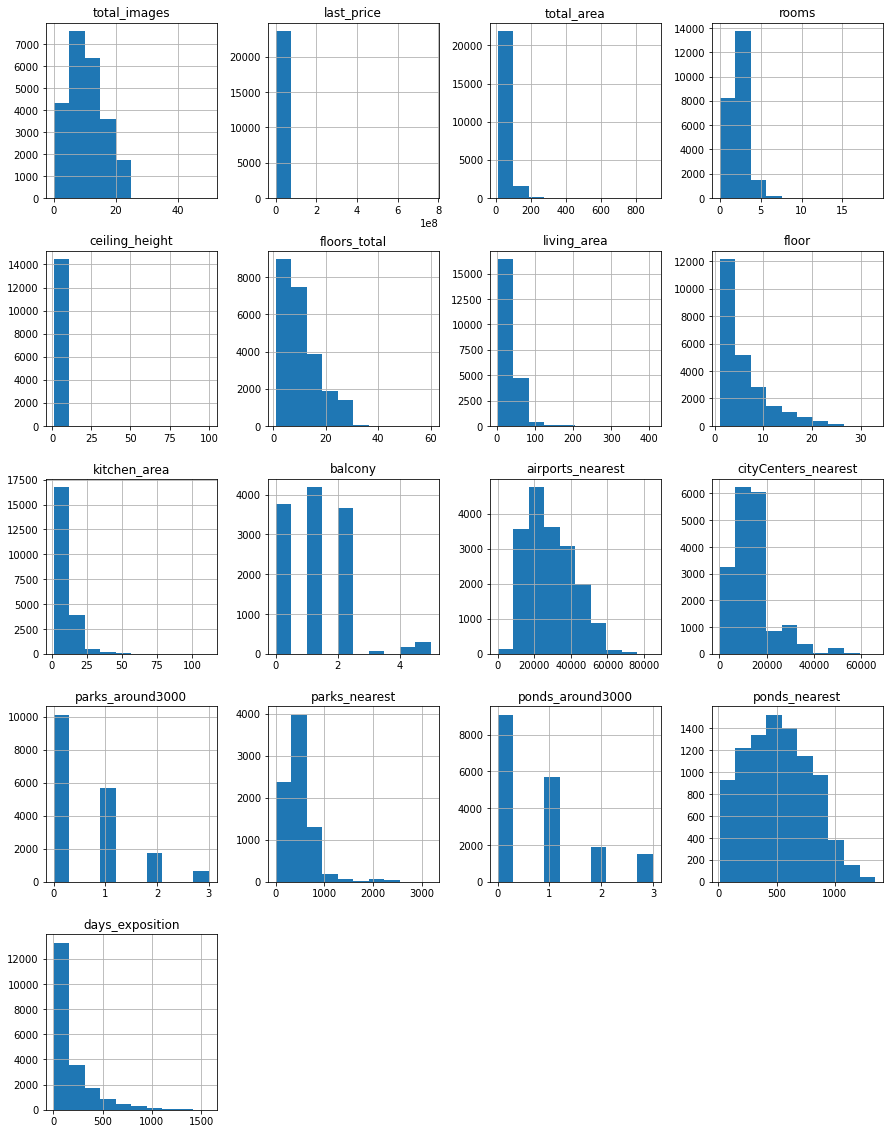

In [5]:
data.hist(figsize=(15,20));

Как можно видеть, построенные гистограммы позволяют сформировать общее впечатление о распределении исходных данных. Так, на первый взгляд, с учётом масштаба гистограмм, в данных отсутствуют аномально высокие значения для всех показателей.
Для таких параметров, как 'total_images', 'rooms', 'airports_nearest', 'cityCenters_nearest', 'parks_nearest' и 'ponds_nearest' видна различной степени тенденция к формированию нормального распределения.

### Предобработка данных

Найдём и изучим пропущенные значения в столбцах с помощью методов isna() и sum():

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В 14 из 22 столбцов имеются пропуски, причём в некоторых столбцах количество пропусков превышает половину всех значений (параметры 'is_apartment', 'parks_nearest', 'ponds_nearest').

Наибольшее количество пропусков (20924) представлено в столбце 'is_apartment', где определяется, является ли квартира апартаментами (булев тип данных: True или False). Соответственно, пропущенные значения в данном случае можно расценить как значение False, поскольку отсутствие значения, говорит о трудности отнесения квартиры к типу "апартаменты".

Также у столбца 'cityCenters_nearest' название необходимо привести к 'змеиному языку'.

Сначала найдём уникальные значения этого столбца и посчитаем их частоту, применяя методы unique() и value_counts():

In [7]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

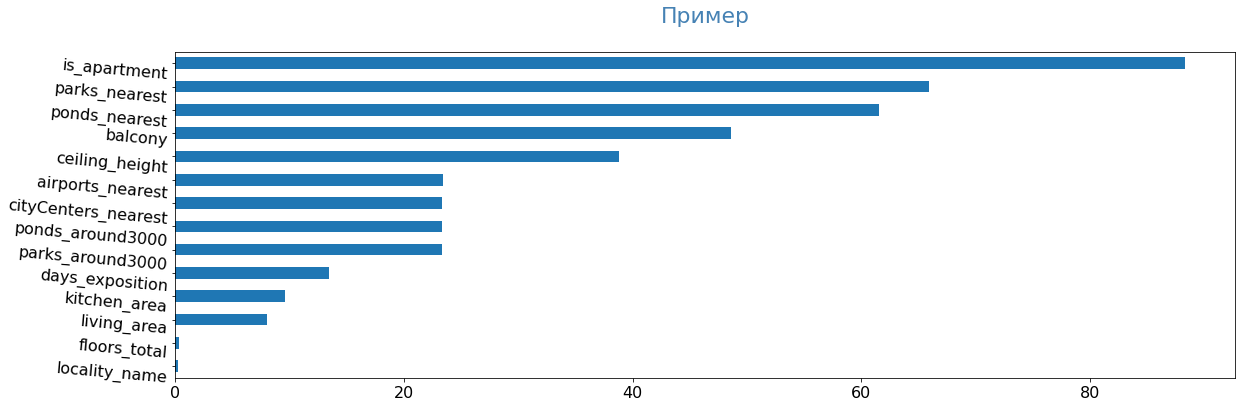

In [8]:
pass_value_barh(data)

In [9]:
print(data['is_apartment'].unique())

data['is_apartment'].value_counts()

[nan False True]


False    2725
True       50
Name: is_apartment, dtype: int64

Так, в столбце 'is_apartment' присутствуют, помимо булевых значений (True и False), значения nan, которые необходимо заменить на False с помощью метода fillna():

In [10]:
data['is_apartment'] = data['is_apartment'].fillna(False)

print(data['is_apartment'].unique())

data['is_apartment'].value_counts()

[False  True]


False    23649
True        50
Name: is_apartment, dtype: int64

В результате имеем, что большая часть исследуемых объектов недвижимости не является апартаментами. А значения в столбце 'is_apartment' приняли булев тип.

Далее скорректируем название столбца 'cityCenters_nearest':

In [11]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

Снова вызовем метод info():

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Перейдём к заполнению других пропущенных значений. В стобцах 'airports_nearest', 'city_centers_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', для которых данные были собраны автоматически на основе картографических данных геосервисов, наличие большого количества пропусков (от 5518 до 15620), вероятно, обусловлено ошибками при сборе этих данных в автоматизированном режиме.

При этом следует отметить, что в исходных данных присутствует 365 населённых пункта.

In [13]:
len(data['locality_name'].unique())

365

Изучим распределение пропусков в столбцах 'airports_nearest' и 'city_centers_nearest' по населённым пункта ('locality_name'):

In [14]:
data.value_counts('locality_name').head(30)

locality_name
Санкт-Петербург            15721
посёлок Мурино               522
посёлок Шушары               440
Всеволожск                   398
Пушкин                       369
Колпино                      338
посёлок Парголово            327
Гатчина                      307
деревня Кудрово              299
Выборг                       237
Петергоф                     201
Сестрорецк                   183
Красное Село                 178
Кудрово                      173
деревня Новое Девяткино      144
Сертолово                    142
Ломоносов                    133
Кириши                       125
Сланцы                       112
Волхов                       111
Кингисепп                    104
Тосно                        104
Кронштадт                     96
Никольское                    93
Коммунар                      89
Сосновый Бор                  87
Кировск                       84
Отрадное                      80
посёлок Бугры                 69
посёлок Металлострой         

In [15]:
data.loc[data['airports_nearest'].isna()].value_counts('locality_name')

locality_name
посёлок Мурино         522
Всеволожск             398
Гатчина                307
деревня Кудрово        299
Выборг                 237
                      ... 
поселок Гладкое          1
поселок Дружноселье      1
поселок Жилгородок       1
поселок Жилпосёлок       1
село Шум                 1
Length: 344, dtype: int64

In [16]:
data.loc[data['city_centers_nearest'].isna()].value_counts('locality_name')

locality_name
посёлок Мурино                           522
Всеволожск                               398
Гатчина                                  307
деревня Кудрово                          299
Выборг                                   237
                                        ... 
поселок городского типа Большая Ижора      1
поселок Цвылёво                            1
деревня Трубников Бор                      1
поселок Усть-Луга                          1
село Шум                                   1
Length: 345, dtype: int64

Как можно видеть, в некоторых населённых пунктах полностью отсутствуют данные о расстояниях до ближайшего аэропорта и центра города. Соответственно, в таких местах нельзя заполнить пропуски средними значениями, рассчитанными для всех населённых пунктов. 
Проверим, в каких ещё столбцах пропущены значения для этих населённых пунктов, сделав срез данных: 

In [17]:
data.loc[data['airports_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,False,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,False,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,...,5.50,NaN,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.50,4,False,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,False,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,False,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Видно, что для таких населённых пунктов отсутствуют данные, собранные в автоматизированном режиме на основе геоданных. 
Будем иметь это в виду в дальнейшем.

Кроме того, не все продавцы квартир знают точную высоту потолков в своей квартире, жилую площадь и площадь кухни, поэтому логично будет заполнить имеющиеся в столбцах 'living_area', 'kitchen_area' и 'ceiling_height' пропуски медианными значениями.

Но предварительно проверим, насколько имеюющиеся данные (с учётом пропусков) корректны. Для этого примем, что как минимум 10% общей площади приходится на коридоры, ванные комнаты, туалеты и балконы. Тогда сумма жилой площади и площади кухни должна быть меньше 90% общей площади. Высота потолков также не может достигать десятков метров, поэтому в первом приближении будем считать, что она должна быть не меньше 2 метров и не больше 10 метров, чтобы точно учесть многоуровневые квартиры. Посмотрим, сколько квартир не удовлетворяет этим условиям:

In [18]:
data.query('total_area * 0.9 <= (living_area + kitchen_area)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,NaN,14.0,59.0,8,False,...,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
171,6,3800000.0,49.0,2019-02-22T00:00:00,2,2.50,9.0,38.0,8,False,...,10.0,1.0,посёлок Шушары,18471.0,24272.0,0.0,NaN,0.0,NaN,11.0
184,7,2600000.0,30.2,2018-02-14T00:00:00,1,2.65,9.0,26.1,5,False,...,6.2,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
220,8,3890000.0,37.0,2018-07-09T00:00:00,1,2.50,25.0,28.0,6,False,...,9.0,NaN,Санкт-Петербург,25408.0,16166.0,0.0,NaN,0.0,NaN,28.0
319,19,4850000.0,59.7,2015-03-19T00:00:00,3,2.50,5.0,47.4,4,False,...,6.4,1.0,Санкт-Петербург,43095.0,15599.0,0.0,NaN,0.0,NaN,974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23216,15,10150000.0,114.0,2015-01-21T00:00:00,4,NaN,5.0,90.2,4,False,...,16.0,NaN,Санкт-Петербург,26259.0,4961.0,0.0,NaN,2.0,838.0,1052.0
23297,10,1850000.0,48.2,2019-03-13T00:00:00,2,NaN,5.0,42.2,2,False,...,6.0,1.0,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23328,12,4299000.0,54.0,2016-11-25T00:00:00,2,NaN,14.0,40.0,8,False,...,10.0,0.0,Колпино,25612.0,31399.0,0.0,NaN,0.0,NaN,343.0
23521,13,8500000.0,65.0,2018-11-01T00:00:00,2,NaN,4.0,44.0,2,False,...,15.3,NaN,Санкт-Петербург,22276.0,3996.0,1.0,627.0,0.0,NaN,NaN


In [19]:
data.query('ceiling_height < 2.0 or ceiling_height > 10.0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.00,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.00,3.0,53.0,2,False,...,8.00,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.00,9.0,30.0,2,False,...,7.00,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.00,25.0,17.0,17,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.00,5.0,19.5,1,True,...,5.50,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.00,5.0,30.0,3,False,...,9.00,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.00,9.0,21.3,3,False,...,7.00,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5712,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,False,...,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.00,36.0,41.0,13,False,...,12.00,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.00,5.0,31.3,5,False,...,5.70,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN


Итак, 475 квартир не удовлетворяют условию по площади, а 28 квартир - условию по высоте потолков. Удалим их, прежде чем заполнять пропуски медианными значениями:

In [20]:
data = data.query('living_area.isna() or kitchen_area.isna() or (living_area != "NaN" and kitchen_area != "NaN" \
and total_area * 0.9 > (living_area + kitchen_area))')

data = data.query('ceiling_height.isna() or (ceiling_height != "NaN" and 2.0 <= ceiling_height <= 10.0)')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23199 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23199 non-null  int64  
 1   last_price            23199 non-null  float64
 2   total_area            23199 non-null  float64
 3   first_day_exposition  23199 non-null  object 
 4   rooms                 23199 non-null  int64  
 5   ceiling_height        14173 non-null  float64
 6   floors_total          23114 non-null  float64
 7   living_area           21296 non-null  float64
 8   floor                 23199 non-null  int64  
 9   is_apartment          23199 non-null  bool   
 10  studio                23199 non-null  bool   
 11  open_plan             23199 non-null  bool   
 12  kitchen_area          20926 non-null  float64
 13  balcony               11956 non-null  float64
 14  locality_name         23150 non-null  object 
 15  airports_nearest   

In [21]:
data.loc[data['living_area'].isna(), 'living_area'] = data['living_area'].median()

data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['kitchen_area'].median()

data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

#data_1 = data.loc[data['living_area'].isna()]

#data_2 = data.pivot_table(index='locality_name', values='living_area', aggfunc='median')

#for row in data_1:
    #if row['locality_name'] == data_2:
        #row['living_area'] = data_2['living_area']
   #else:
        #print('Ошибка!')

Проверим, насколько корректно были заполнены пропущенные значения, снова проверив данные на предложенные условия по площади квартиры и высоте потолков:

In [22]:
data.query('total_area * 0.9 <= (living_area + kitchen_area)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.65,9.0,30.0,2,False,...,9.1,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22.0,30.0,3,False,...,9.1,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
60,3,2740000.0,35.0,2018-01-01T00:00:00,1,2.65,12.0,30.0,8,False,...,9.1,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
133,12,3150000.0,31.0,2018-03-23T00:00:00,1,2.65,25.0,30.0,6,False,...,9.1,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,78.0
144,1,2450000.0,27.0,2017-03-30T00:00:00,0,2.65,24.0,15.5,2,False,...,9.1,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23592,10,1450000.0,29.0,2017-11-11T00:00:00,0,2.65,9.0,18.0,8,False,...,9.1,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0
23601,10,2900000.0,43.4,2018-01-11T00:00:00,2,2.65,5.0,30.0,1,False,...,9.1,NaN,Санкт-Петербург,22001.0,14193.0,1.0,202.0,2.0,397.0,45.0
23632,20,5000000.0,38.0,2018-06-23T00:00:00,1,2.55,16.0,30.0,15,False,...,9.1,1.0,Санкт-Петербург,31118.0,7257.0,1.0,241.0,1.0,230.0,113.0
23637,8,2350000.0,26.0,2018-06-26T00:00:00,0,2.65,25.0,17.0,4,False,...,9.1,2.0,посёлок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,207.0


In [23]:
data.query('ceiling_height < 2.0 or ceiling_height > 10.0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Как можно видеть, теперь все пропуски в этих столбцах заполнены, однако некоторые данные в столбцах 'living_area' и 'kitchen_area' не удовлетворяют условию. Тогда удалим эти аномальные значения:

In [24]:
data = data.query('total_area * 0.9 > (living_area + kitchen_area)')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22213 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22213 non-null  int64  
 1   last_price            22213 non-null  float64
 2   total_area            22213 non-null  float64
 3   first_day_exposition  22213 non-null  object 
 4   rooms                 22213 non-null  int64  
 5   ceiling_height        22213 non-null  float64
 6   floors_total          22144 non-null  float64
 7   living_area           22213 non-null  float64
 8   floor                 22213 non-null  int64  
 9   is_apartment          22213 non-null  bool   
 10  studio                22213 non-null  bool   
 11  open_plan             22213 non-null  bool   
 12  kitchen_area          22213 non-null  float64
 13  balcony               11602 non-null  float64
 14  locality_name         22167 non-null  object 
 15  airports_nearest   

В результате в данных осталось 22213 строк.

В столбце 'days_exposition' также есть пропуски. Это может говорить о том, что часть квартир ещё не проданы, а значит, эти пропуски необходимо оставить.

Также большое количество пользователей не вписали данные в столбец 'balcony', поскольку, вероятно, посчитали, что при отсутствии балкона можно пропустить заполнение этого столбца. В таком случае заполним пропуски нулями, воспользовавшись методом fillna(): 

In [25]:
data['balcony'] = data['balcony'].fillna(0)

Таким образом, где это было возможно, пропуски были заполнены.
Проверим это и заполним оставшиеся пропуски нулями:

In [26]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               69
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              46
airports_nearest         5021
city_centers_nearest     4998
parks_around3000         4997
parks_nearest           14519
ponds_around3000         4997
ponds_nearest           13620
days_exposition          3026
dtype: int64

In [27]:
data = data.fillna(0)

Теперь можно изучить типы данных в data:

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22213 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22213 non-null  int64  
 1   last_price            22213 non-null  float64
 2   total_area            22213 non-null  float64
 3   first_day_exposition  22213 non-null  object 
 4   rooms                 22213 non-null  int64  
 5   ceiling_height        22213 non-null  float64
 6   floors_total          22213 non-null  float64
 7   living_area           22213 non-null  float64
 8   floor                 22213 non-null  int64  
 9   is_apartment          22213 non-null  bool   
 10  studio                22213 non-null  bool   
 11  open_plan             22213 non-null  bool   
 12  kitchen_area          22213 non-null  float64
 13  balcony               22213 non-null  float64
 14  locality_name         22213 non-null  object 
 15  airports_nearest   

Итак, тип данных необходимо изменить в следующих столбцах:
- first_day_exposition - дата публикации, однако имеет тип object, что говорит о необходимости перевода значений в тип datetime;
- floors_total - всего этажей в доме, значит, принимает только целые значения (int64), а имеет тип float64;
- balcony - число балконов, также может принимать только целые значения (int64), а имеет тип float 64;
- parks_around3000 - число парков в радиусе 3 км, также может принимать только целые значения (int64), а имеет тип float 64;
- pond_around3000 - число водоёмов в радиусе 3 км, также может принимать только целые значения (int64), а имеет тип float 64;
- days_exposition - сколько дней было размещено объявление (от публикации до снятия), а значит, тоже может принимать только целые значения (int64), а имеет тип float 64.

Таким образом, 1 столбец должен быть изменён на тип datetime, а 5 стобцов - тип int64.

Изменим тип данных в столбце 'first_day_exposition' с object на datetime, применив метод Pandas to_datetime:

In [29]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 22213, dtype: datetime64[ns]

Теперь даты записаны привычным образом.
Далее изменим в вышеописанных столбцах тип float64 на int64, используя метод astype():

In [30]:
data[['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']] = \
data[['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']].astype(int)

data[['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']]



,floors_total,balcony,parks_around3000,ponds_around3000,days_exposition
0,16,0,1,2,0
1,11,2,0,0,81
2,5,0,1,2,558
3,14,0,2,3,424
4,14,0,2,1,121
...,...,...,...,...,...
23694,5,0,1,3,0
23695,5,0,0,0,45
23696,3,0,0,0,0
23697,17,2,2,3,602


Получили целочисленные значения там, где они требуются.

Снова посмотрим общую информацию о data, чтобы убедиться, что все необходимые изменения в типы данных внесены успешно:

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22213 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22213 non-null  int64         
 1   last_price            22213 non-null  float64       
 2   total_area            22213 non-null  float64       
 3   first_day_exposition  22213 non-null  datetime64[ns]
 4   rooms                 22213 non-null  int64         
 5   ceiling_height        22213 non-null  float64       
 6   floors_total          22213 non-null  int64         
 7   living_area           22213 non-null  float64       
 8   floor                 22213 non-null  int64         
 9   is_apartment          22213 non-null  bool          
 10  studio                22213 non-null  bool          
 11  open_plan             22213 non-null  bool          
 12  kitchen_area          22213 non-null  float64       
 13  balcony         

Теперь изучим уникальные значения в столбце 'locality_name' с помощью метода unique(), предварительно удалив нулевые значения, которыми были заполнены пропуски:

In [32]:
data = data.query('locality_name != 0') 

print(data['locality_name'].unique())
      
len(data['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'посёлок Плодовое' 'деревня Заклинье'
 'поселок Торковичи' 'поселок Первомайское' 'Красное Село'
 'посёлок Понтонный' 'Сясьстрой' 'деревня Старая' 'деревня Лесколово'
 'посёлок Новый Свет' 'село Путилово' 'Ивангород' 'Мурино' 'Сланцы'
 'Шлиссельбург' 'Никольское' 'Зеленогорск' 'Сосновый Бор'
 'поселок Новый Свет' 'деревня Оржицы' 'деревня Кальтино' 'Кудрово'

354

Как можно видеть, в данных после обработки пропущенных значений присутствует 354 наименования населённых пунктов.

Чтобы избавиться от неявных дубликатов, т.е. объединить населённые пункты с одинаковыми именами собственными, заменим в столбце 'locality_name' букву "ё" на "е" и уберём из названий типы населённых пунктов ("посёлок", "деревня" и т.д.), применив метод replace():

In [33]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок ','городской ','городского типа ','садовое товарищество ','садоводческое некоммерческое товарищество '\
    , 'коттеджный ','станции ','при железнодорожной ','село ','деревня ', 'Платформа ', 'Пансионат '], '', regex=True)
)

print(data['locality_name'].unique())

len(data['locality_name'].unique())

['Санкт-Петербург' 'Шушары' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Колпино' 'Красный Бор'
 'Гатчина' 'Федоровское' 'Выборг' 'Кронштадт' 'Кировск' 'Новое Девяткино'
 'Металлострой' 'Лебяжье' 'Сиверский' 'Молодцово' 'Кузьмоловский'
 'Новая Ропша' 'Павловск' 'Пикколово' 'Всеволожск' 'Волхов' 'Кингисепп'
 'Приозерск' 'Сестрорецк' 'Куттузи' 'Аннино' 'Плодовое' 'Заклинье'
 'Торковичи' 'Первомайское' 'Красное Село' 'Понтонный' 'Сясьстрой'
 'Старая' 'Лесколово' 'Новый Свет' 'Путилово' 'Ивангород' 'Сланцы'
 'Шлиссельбург' 'Никольское' 'Зеленогорск' 'Сосновый Бор' 'Оржицы'
 'Кальтино' 'Романовка' 'Бугры' 'Рощино' 'Кириши' 'Луга' 'Волосово'
 'Отрадное' 'Павлово' 'Оредеж' 'Коммунар' 'Молодежное' 'Тихвин' 'Победа'
 'Нурма' 'Синявино' 'Тосно' 'Стрельна' 'Бокситогорск' 'Александровская'
 'Лопухинка' 'Пикалево' 'Терволово' 'Советский' 'Подпорожье' 'Петровское'
 'Токсово' 'Сельцо' 'Вырица' 'Кипень' 'Келози' 'Вартемяги' 'Тельмана'
 'Севастьяново' 'Большая 

295

In [34]:
data['locality_name'].nunique()

295

В результате неявные дубликаты были удалены и число названий населённых пунктов уменьшилось до 296.  

Исследуем данные на явные дубликаты:

In [35]:
data.duplicated().sum()

0

Представленные данные не имеют дублирующихся записей.

### Посчитайте и добавьте в таблицу новые столбцы

Добавим в таблицу новые столбцы со следующими параметрами:
- цена одного квадратного метра;
- день недели публикации объявления;
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры;
- расстояние до центра города в километрах.

Итак, столбец с ценой одного квадратного метра назовём 'price_sqm', поделив стоимость объекта на его общую площадь, а затем округлив до двух знаков после запятой:

In [36]:
data['price_sqm'] = (data['last_price'] / data['total_area']).round(2)

Проверим, правильность данных в новом столбце, выведя на экран следующее:

In [37]:
data[['last_price', 'total_area', 'price_sqm']]

,last_price,total_area,price_sqm
0,13000000.0,108.00,120370.37
1,3350000.0,40.40,82920.79
2,5196000.0,56.00,92785.71
3,64900000.0,159.00,408176.10
4,10000000.0,100.00,100000.00
...,...,...,...
23694,9700000.0,133.81,72490.85
23695,3100000.0,59.00,52542.37
23696,2500000.0,56.70,44091.71
23697,11475000.0,76.75,149511.40


Как можно видеть, значения в столбце 'price_sqm' отображаются корректно.

Теперь создадим столбцы, которые будут отображать день недели (0 — понедельник, 1 — вторник и так далее), месяц и год публикации объявления, передав им следующие названия: 'weekday_exp', 'month_exp', 'year_exp', соответственно, - и применив соответствующие методы (dt.weekday, pd.DatetimeIndex().month, pd.DatetimeIndex().year):

In [38]:
data['weekday_exp'] = data['first_day_exposition'].dt.weekday

data['month_exp'] = pd.DatetimeIndex(data['first_day_exposition']).month

data['year_exp'] = pd.DatetimeIndex(data['first_day_exposition']).year

Проверим правильность информации в этих столбцах:

In [39]:
data[['first_day_exposition', 'weekday_exp', 'month_exp', 'year_exp']]

,first_day_exposition,weekday_exp,month_exp,year_exp
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
3,2015-07-24,4,7,2015
4,2018-06-19,1,6,2018
...,...,...,...,...
23694,2017-03-21,1,3,2017
23695,2018-01-15,0,1,2018
23696,2018-02-11,6,2,2018
23697,2017-03-28,1,3,2017


Видно, что новые столбцы с датами отображают правильные данные.

Далее разделим этажи квартиры на категории: «первый», «последний», «другой». 
Для этого сначала убедимся, что значения в столбце 'floor' начинаются с 1, применив метод unique(): 

In [40]:
data['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

Нулевых (0) этажей нет, отсчёт начинается с единицы (1). 

Теперь создадим функцию floor_type, которая будет распределять этажи квартиры по вышеописанным категориям, и создадим столбец 'floor_type', применив к data эту функцию:

In [41]:
def floor_type(row): #Создадим функцию от строчки row
     #Функция перебирает значения в столбце 'floor' для каждой строчки row:
    if row['floor'] == 1: #Если значение в столбце 'floor' равно 1, то возвращается значение 'первый'
        return 'первый'
    elif row['floor'] == row['floors_total']: #Если значение в столбце 'floor' равно значению в столбце 'floors_total'
    #, то возвращается значение 'последний'
        return 'последний'
    elif row['floor'] <= 0: #Учтём возможные нулевые и отрицательные значения в столбце 'floor'
        return 'ошибка'
    else: #Во всех остальных случаях выводится значение 'другой'.
        return 'другой'
#Применим созданную функцию к data, создав столбец 'floor_type':    
data['floor_type'] = data.apply(floor_type, axis=1)

Проверим правильность работы созданной функции, выведя на экран первые 20 значений в столбцах 'floor', 'floors_total', 'floor_type':

In [42]:
data[['floor', 'floors_total','floor_type']].head(20)

,floor,floors_total,floor_type
0,8,16,другой
1,1,11,первый
2,4,5,другой
3,9,14,другой
4,13,14,другой
5,5,12,другой
6,6,26,другой
7,22,24,другой
8,26,27,другой
9,7,9,другой


Как можно видеть, функция работает корректно.

Наконец, создадим столбец 'city_centers_dist_km', где будет отражено расстояние до центра города в километрах. Так, поделим данные из столбца 'city_centers_nearest' на 1000, чтобы перевести из м в км, и округлим до ближайших целых значений с помощью метода round():

In [43]:
data['city_centers_dist_km'] = (data['city_centers_nearest'] / 1000).round()

Убедимся в корректности данных в новом столбце:

In [44]:
data[['city_centers_nearest', 'city_centers_dist_km']]

,city_centers_nearest,city_centers_dist_km
0,16028.0,16.0
1,18603.0,19.0
2,13933.0,14.0
3,6800.0,7.0
4,8098.0,8.0
...,...,...
23694,4232.0,4.0
23695,0.0,0.0
23696,0.0,0.0
23697,10364.0,10.0


Данные в новом столбце отображаются правильно.

Итак, в таблицу с исходными данными было добавлено 6 новых столбцов со следующими параметрами:
- цена одного квадратного метра;
- день недели публикации объявления;
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры;
- расстояние до центра города в километрах.

Эти столбцы помогут в дальнейшем при проведении исследовательского анализа данных.

### Проведите исследовательский анализ данных

1. Изучим перечисленные ниже параметры объектов и построим отдельные гистограммы для каждого из этих параметров, используя метод hist(). Для большей точности по умолчанию будем разделять данные на 20 областей (bins=20) при создании гистограмм.

Список параметров:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка.

Итак, построим гистограмму для общей площади квартир (столбец 'total_area'). Сначала выведем общие характеристики по данным из этого столбца, применив метод describe():

In [45]:
data['total_area'].describe()

count    22167.000000
mean        61.379981
std         35.771529
min         18.000000
25%         41.000000
50%         53.000000
75%         70.200000
max        900.000000
Name: total_area, dtype: float64

Минимальная площадь квартиры составляет 18 квадратных метров, а максимальная - 900, причём стандартное отклонение достаточно велико, а значит, в выборке присутствуют аномальные значения или выбросы. Об этом также свидетельствует различие между средним и медианным значениями: 61.4 и 53.0 квадратный метр, соответственно.

Построим гистограмму:

<AxesSubplot:>

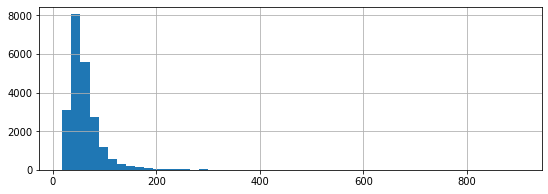

In [46]:
data['total_area'].hist(bins=50, figsize = (9,3))

Видно, что большинство квартир имеют площадь менее 200 квадратных метров. Ограничим данные на гистограмме:

<AxesSubplot:>

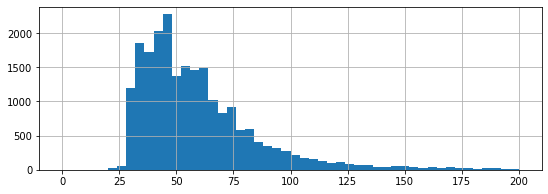

In [47]:
data['total_area'].hist(bins=50, range=(0,200), figsize = (9,3))

Видно, что квартир менее 25 и более 175 квадратных метров крайне мало. Проверим это:

In [48]:
len(data.query('25 <= total_area <= 175.0')) / len(data)

0.9840754274371813

Более 98 % квартир имеют площадь от 25 до 175 квадратных метров, удалим остальные квартиры из столбца 'total_area' и снова вызовем метод desribe(): 

In [49]:
data = data.query('25 <= total_area <= 175.0')
data['total_area'].describe()

count    21814.000000
mean        58.600303
std         24.888677
min         25.000000
25%         41.000000
50%         53.000000
75%         69.500000
max        175.000000
Name: total_area, dtype: float64

В данных осталось 21814 строки. Среднее и медианное значения тем не менее стали более близкими: 58.6 и 53.0 квадратных метров, соответственно. А стандартное отклонение уменьшилось с 35.8 до 24.9.

Теперь можно строить гистограмму:

<AxesSubplot:>

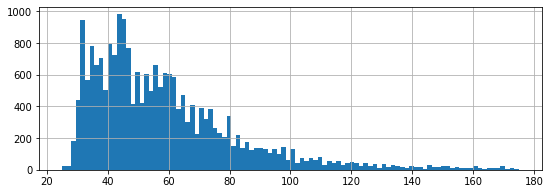

In [50]:
data['total_area'].hist(bins=100, figsize = (9,3))

При этом наиболее распространены квартиры с общей площадью от 30 до 50 квадратных метров, что в целом находится на уровне средней площади квартир. Далее по мере роста общей площади выше 50 квадратных метров количество квартир постепенно снижается. 

Теперь проведём аналогичный анализ для жилой площади ('living_area') и площади кухни ('kitchen_area'). 

Сначала исследуем общие данные в столбце 'living_area':

In [51]:
data['living_area'].describe()

count    21814.000000
mean        32.700875
std         15.876401
min          2.000000
25%         19.000000
50%         30.000000
75%         41.000000
max        127.700000
Name: living_area, dtype: float64

Здесь мы наблюдаем тенденции, характерные для вышеописанных данных по общей площади квартиры: достаточно большая разница между максимальным (127.7) и минимальным (2.0) значениями, относительно небольшой разброс данных (15.9), незначительно различающиеся среднее (32.7) и медианное (30.0) значения.

Построим теперь гистограмму:

<AxesSubplot:>

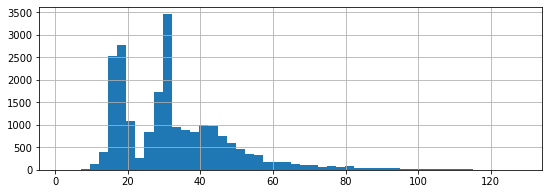

In [52]:
data['living_area'].hist(bins=50, figsize = (9,3))

Наиболее распространённая жилая площадь находится примерно на уровне 30 квадратных метров: таких квартир приблизительно 3.5 тысячи. Следующая по частоте жилая площадь находится приблизительно на уровне 15-20 квадратных метров - таких квартир в сумме около 5 тысяч. При дальнейшем увеличении жилой площади количество квартир, как и в случае общей площади, снижается. В целом квартир с жилой площадью менее 10 и более 100 квадратных метров крайне мало:

In [53]:
len(data.query('10 <= living_area <= 100.0')) / len(data)

0.994498945631246

Более 99 % квартир имеют жилую площадь от 10 до 100 квадратных метров, удалим остальные квартиры из столбца 'living_area':

In [54]:
data = data.query('10 <= living_area <= 100.0')

Аналогичные действия проделаем для изучения данных по площади кухни. Начнём с общего описания данных:

In [55]:
data['kitchen_area'].describe()

count    21694.000000
mean        10.137155
std          4.860018
min          1.300000
25%          7.100000
50%          9.100000
75%         11.300000
max         75.000000
Name: kitchen_area, dtype: float64

Мы можем наблюдать, что как и в случаях с общей площадью и жилой площадью квартиры, данные по площади кухни имеют аналогичные тенденции.

Построим гистограмму:

<AxesSubplot:>

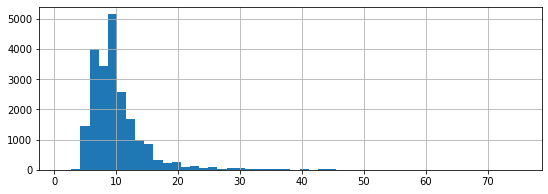

In [56]:
data['kitchen_area'].hist(bins=50, figsize = (9,3))

Квартир с площадью кухни более 25 квадратных метров очень мало. Ограничим данные на гистограмме:

<AxesSubplot:>

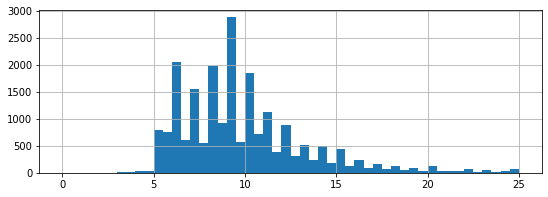

In [57]:
data['kitchen_area'].hist(bins=50, range=(0,25), figsize = (9,3))

Площадь кухни в основном находится в пределах между 5 и 25 квадратными метрами:

In [58]:
len(data.query('5 <= kitchen_area <= 25.0')) / len(data)

0.9797178943486679

Около 98 % квартир имеют кухню площадью от 5 до 25 квадратных метров. Ограничим данные:

In [59]:
data = data.query('5 <= kitchen_area <= 25.0')

Далее изучим данные по стоимости объекта недвижимости из столбца 'last_price':

In [60]:
data['last_price'].describe()

count    2.125400e+04
mean     5.725850e+06
std      4.539544e+06
min      4.300000e+05
25%      3.495000e+06
50%      4.650000e+06
75%      6.550000e+06
max      1.240000e+08
Name: last_price, dtype: float64

Представленные данные имеют большой разброс значений: от сотен тысяч (e+05) до сотен миллионов (e+08).

Для удобства анализа разделим данные в столбце 'last_price' на 1000000 и вновь выведем общие сведения:

In [61]:
data['last_price'] = data['last_price'] / 1000000

data['last_price'].describe()

count    21254.000000
mean         5.725850
std          4.539544
min          0.430000
25%          3.495000
50%          4.650000
75%          6.550000
max        124.000000
Name: last_price, dtype: float64

Как можно видеть, среднее значение несколько завышено относительно медианного: 5.73 миллиона против 4.65 миллиона, при этом стандартное отклонение составляет 4.54 миллиона. А 75 % квартир имеют стоимость менее 6.55 миллионов.

Построим гистограмму:

<AxesSubplot:>

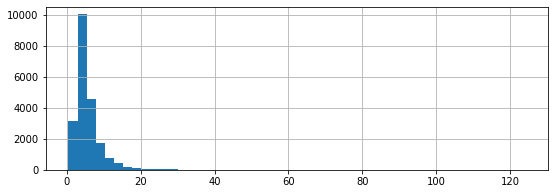

In [62]:
data['last_price'].hist(bins=50, figsize = (9,3))

Видно, что стоимость большинства квартир не превышает 30 миллионов. Ограничим данные на гистограмме и посчитаем долю таких квартир:

<AxesSubplot:>

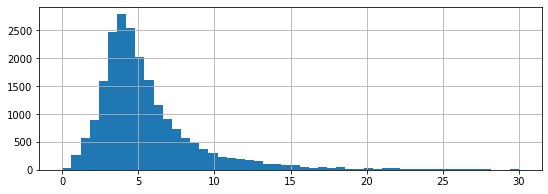

In [63]:
data['last_price'].hist(bins=50, range=(0,30), figsize = (9,3))

Как можно наблюдать, самая распространённая стоимость квартир находится в промежутке между 2,5 и 5 миллионами, что, вероятно, объясняется большим количеством квартир относительно небольшой площади (до 50 квадратных метров).

In [64]:
len(data.query('last_price < 30.0')) / len(data)

0.9955302531288228

Более 99% квартир имеют стоимость в пределах 30 миллионов. Ограничим данные в столбце 'last_price' значением 30.0:

In [65]:
data = data.query('last_price <= 30.0')

Далее рассмотрим данные по количеству комнат в квартирах:

In [66]:
data['rooms'].describe()

count    21162.000000
mean         2.037189
std          0.933337
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

Как можно видеть, среднее и медианное значение достаточно близки: 2.04 и 2.00, соответственно. А 75 % квартир состоят из 3 комнат.

Теперь построим гистограмму:

<AxesSubplot:>

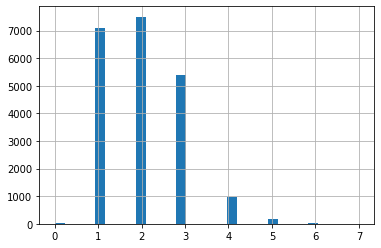

In [67]:
data['rooms'].hist(bins=30)

Большая часть квартир имеют от 1 до 3 комнат..

Рассмотрим данные по высоте потолков в квартирах:

In [68]:
data['ceiling_height'].describe()

count    21162.000000
mean         2.685480
std          0.211212
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

Как можно заметить, высота потолков варьируется между 2.0 и 8.3 метрами, при этом медианное и среднее значения различаются крайне незначительно: 2.69 м и 2.65 м, соответственно.

Теперь построим гистограмму:

<AxesSubplot:>

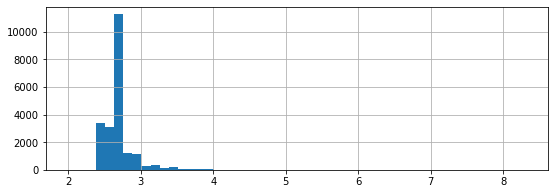

In [69]:
data['ceiling_height'].hist(bins=50, figsize = (9,3))

Видно, что большинство потолков имеют высоту между 2.5 и 3.5 метрами. Проверим это:

In [70]:
len(data.query('2.5 <= ceiling_height <= 3.5')) / len(data)

0.9887061714393724

Почти 99 % потолков входят в этот диапазон. С учётом этого обновим данные и снова построим гистограмму:

<AxesSubplot:>

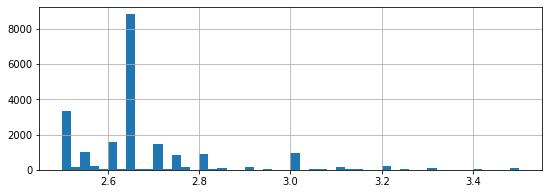

In [71]:
data = data.query('2.5 <= ceiling_height <= 3.5')

data['ceiling_height'].hist(bins=50, figsize = (9,3))

Наиболее распространённая высота потолков находится примерно на уровне примерно 2.65 м и присутствует в около 9 тысячах квартир, что вполне логично, так как это типичная высота потолков в старых жилых домах, например, в 'хрущёвках'. Далее более 3 тысяч квартир имеют высоту потолков 2.5 м.

Теперь посмотрим на этажах какого типа расположены квартиры:

<AxesSubplot:>

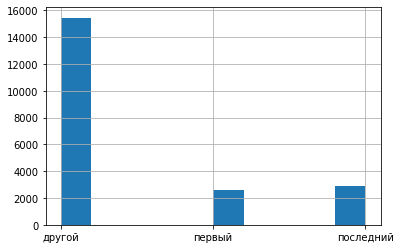

In [72]:
data['floor_type'].hist()

Очевидно, что большинство квартир (более 15 тысяч) расположены между первым и последним этажами. В то же время число квартир на первом и последнем этажах незначительно различается, что может быть обусловлено меньшим количество квартир на первых этажах домов вследствие сдачи таких этажей в аренду.

Далее исследуем распределение квартир по количеству этажей в домах, в которых они расположены:

In [73]:
data['floors_total'].describe()

count    20923.000000
mean        10.680830
std          6.549527
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Этажность домов значительно разнится: от одноэтажных объектов до небоскрёбов (60 этажей). Это обуславливает отличия медианного и среднего значения: 9.0 и 10.7, соответственно.

Построим гистограмму:

<AxesSubplot:>

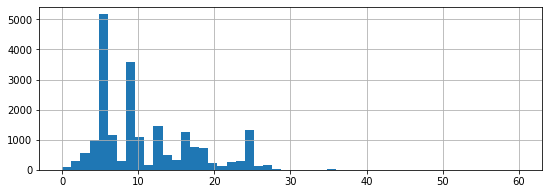

In [74]:
data['floors_total'].hist(bins=50, figsize = (9,3))

Большинство домов имеют этажность менее 30. Проверим, какая доля домов с этажностью выше 30:

In [75]:
len(data.query('floors_total > 30')) / len(data)

0.0011948573340343164

Менее 0.1 % домов имеет более 30 этажей. Можно убрать из рассмотрения такие дома:

In [76]:
data = data.query('floors_total <= 30')

Снова построим гистограмму

<AxesSubplot:>

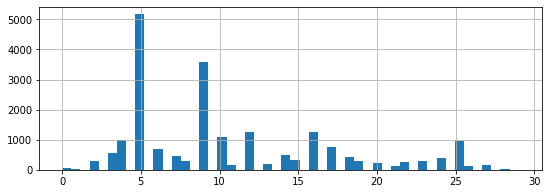

In [77]:
data['floors_total'].hist(bins=50, figsize = (9,3))

Можно видеть, что наибольшее количество объектов имеют типичные значения этажности: 4 (около 1 тысячи квартир), 5 (более 5 тысяч квартир), 9 (3.5  тысячи квартир), 10 (около 1 тысячи квартир), 12 (более 1 тысячи квартир), 16 (более 1 тысячи квартир) и 25 (около 1 тысячи квартир).

Наконец, рассмотрим расстояния от квартиры до центра города (столбец 'city_centers_nearest') и ближайшего парка (столбец 'parks_nearest'), предварительно исключив из анализа нулевые значения:

In [78]:
data.loc[data['city_centers_nearest'] != 0]['city_centers_nearest'].describe()

count    16022.000000
mean     14635.854138
std       8542.542058
min        287.000000
25%      10076.250000
50%      13335.000000
75%      16502.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Общие характеристики показывают, что среднее и медианное значение для расстояния от квартиры до центра города довольно близки - около 14.6 и 13.3 км, соответственно. Причём только 25 % квартир удалены от центра на расстояние более 16.5 км, что говорит об относительно небольшой удалённости большинства квартир от центра города и, соответственно, доступности городской инфраструктуры.

Построим гистограмму, предварительно убрав из рассмотрения нулевые значения:

<AxesSubplot:>

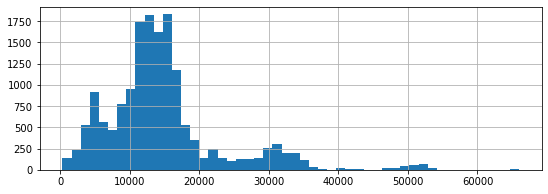

In [79]:
data.loc[data['city_centers_nearest'] != 0]['city_centers_nearest'].hist(bins=50, figsize = (9,3))

Как можно наблюдать, наиболее часто квартиры удалены от центра города на 10 - 20 км, причём основная масса квартир удалена от центра на расстояние менее 40 км. Посчитаем их долю:

In [80]:
len(data.query('city_centers_nearest < 40000.0')) / len(data)

0.9869844004210929

Так, более 98% квартир удалены от центра на 40 км и менее. Ограничим данные:

In [81]:
data = data.query('city_centers_nearest != 0 or city_centers_nearest < 40000.0')

Теперь изучим доступность зелёных зон, а именно парков, также предварительно убрав из анализа нулевые значения:

In [82]:
data.loc[data['parks_nearest'] != 0]['parks_nearest'].describe()

count    6939.000000
mean      493.695489
std       339.971386
min         1.000000
25%       290.500000
50%       456.000000
75%       614.500000
max      3190.000000
Name: parks_nearest, dtype: float64

Можно видеть, что в среднем квартиры находятся на небольшом расстоянии от парков - около 441 метра, причём 75% квартир находятся на расстоянии не более 593 м от парков.

Построим гистограмму, предварительно убрав из рассмотрения нулевые значения:

<AxesSubplot:>

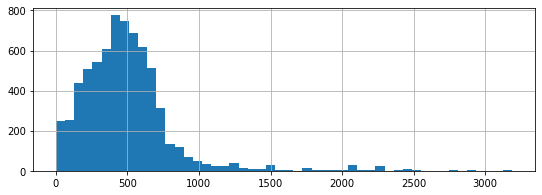

In [83]:
data.loc[data['parks_nearest'] != 0]['parks_nearest'].hist(bins=50, figsize = (9,3))

Теперь видно, что в распределение квартир по расстоянию от ближайшего парка в целом напоминает нормальное распределение с максимумом в области 500 м.

2. Изучим, как быстро продавались квартиры (столбец 'days_exposition'). Этот параметр показывает, сколько дней было размещено каждое объявление.

Для начала рассмотрим общие сведения по этому столбцу, предварительно убрав 3 тысячи нулевых значений, чтобы они не искажали результат:

In [84]:
data.loc[data['days_exposition'] != 0]['days_exposition'].describe()

count    18168.000000
mean       179.729029
std        217.380205
min          1.000000
25%         45.000000
50%         96.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

Как можно видеть, квартиры продавались от 1 до 1580 дней, причём 25 % квартир продавались более 229 дней. Поэтому среднее значение сильно превышает медианное: 179.7 дней против 96 дней. Кроме того, стандартное отклонение превышает оба этих показателя. 

Построим гистограмму, предварительно убрав из рассмотрения нулевые значения:

<AxesSubplot:>

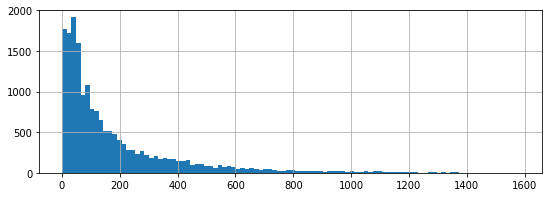

In [85]:
data.loc[data['days_exposition'] != 0]['days_exposition'].hist(bins=100, figsize = (9,3))

Рассмотрим подробнее промежуток от 0 до 100 дней и от 0 до 10 дней:

<AxesSubplot:>

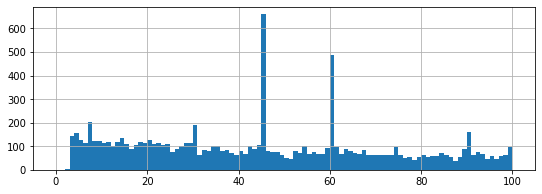

In [86]:
data.loc[data['days_exposition'] != 0]['days_exposition'].hist(bins=100, range=(0,100), figsize = (9,3))

<AxesSubplot:>

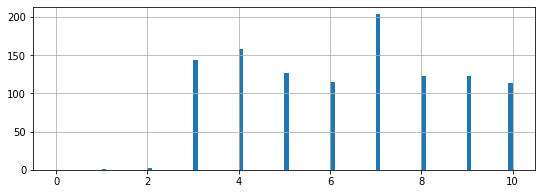

In [87]:
data.loc[data['days_exposition'] != 0]['days_exposition'].hist(bins=100, range=(0,10), figsize = (9,3))

Можно видеть, что в течение 1-2 дней продавалось крайне мало квартир. В то же время наиболее часто квартиры продавались в течение примерно 45 дней, т.е. это типичный срок продажи квартиры. При этом по мере роста продожительности продаж число квартир снижается. Так, почти на всём промежутке от 0 до 100 дней наблюдается постепенное снижение числа продаваемых квартир. Причём на общем фоне выделяются продажи в течение 7 дней (около 200 квартир), 30 дней (около 200 квартир), 45 дней (около 650 квартир), 60 дней (около 500 квартир) и 90 дней (около 150 квартир). Это объясняется стандартными сроками публикации объявлений о продаже квартиры в Яндексе. 

Соотвественно, продажи квартир, осуществленные за менее чем 45 дней, можно считать быстрыми.

Теперь определим, какие сроки продажи квартиры можно считать необычно долгими. Посмотрим распределение данных в этом столбце по квантилям:

In [88]:
 data['days_exposition'].quantile([0.0012, 0.01, .5, .99, .9988])

0.0012       0.000
0.0100       0.000
0.5000      75.000
0.9900    1021.030
0.9988    1354.618
Name: days_exposition, dtype: float64

99 % всех квартир продаётся в течение не более 1021 дня, поэтому более длительные сроки можно считать необычно долгими.

С учётом выше сказанного ограничим данные в столбце 'days_exposition', вызовем метод describe() и снова построим гистограмму:

In [89]:
data = data.query('2 < days_exposition < 1021')

data['days_exposition'].describe()

count    17955.000000
mean       167.980730
std        188.742036
min          3.000000
25%         44.000000
50%         94.000000
75%        221.000000
max       1018.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

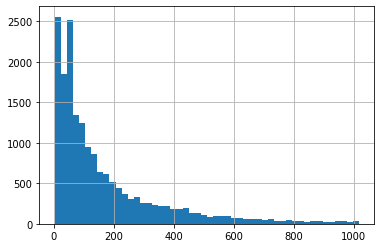

In [90]:
data['days_exposition'].hist(bins=50)

Как можно видеть, средние и медианные значения сблизились: 168 и 94 дней, соответственно. Стандартное отклонение приблизилось к среднему значению: 188.7 дней.

Посмотрим, как изменялся срок продажи квартир в зависимости от года:

<AxesSubplot:xlabel='year_exp'>

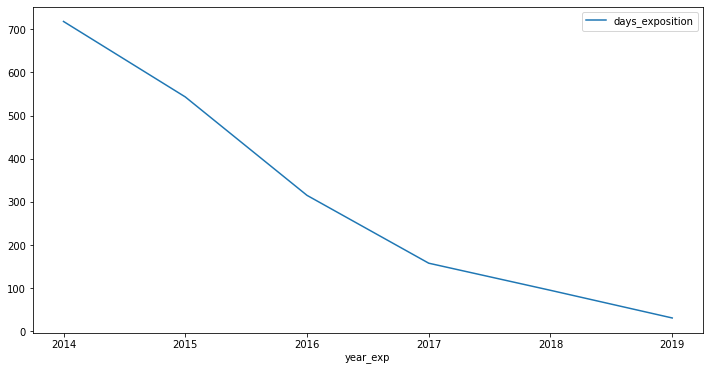

In [91]:
data.pivot_table(index='year_exp', values='days_exposition').plot(figsize=(12,6))

Видно, что на протяжении рассматриваемого периода времени, средний срок продажи квартир снижался с примерно 700 дней в 2014 году, до около 50 дней в 2019 году. Это, вероятно, обусловлено, тем, что в этот период рос спрос на приобретение недвижимости, вызванный снижением процентных ставок по ипотекам, а также тем, что увеличивались темпы ввода нового жилья в эксплуатацию. 

3. Изучим факторы, которые больше всего влияют на общую (полную) стоимость объекта недвижимости. Для этого исследуем,  зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Сначала построим график зависимости общей стоимости квартиры от общей площади, используя метод plot():

<AxesSubplot:xlabel='total_area'>

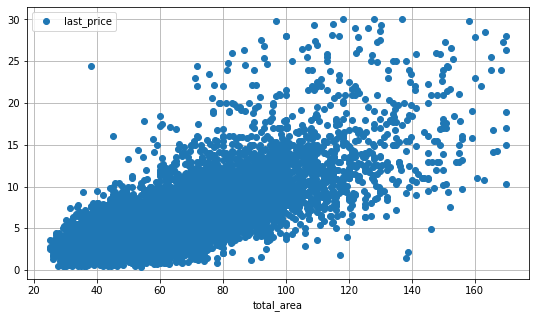

In [92]:
data.plot(
    x='total_area', 
    y='last_price',
    style='o',
    grid=True,
    figsize=(9, 5)
)

In [93]:
data['total_area'].corr(data['last_price'])

0.7540308900995589

Как можно видеть, за исключением редких выбросов с ростом общей площади квартиры растёт её полная стоимость практически линейным образом (коэффициент корреляции составил более 75%), что логично.

Теперь рассмотрим зависимости общей стоимости квартиры от жилой площади:

<AxesSubplot:xlabel='living_area'>

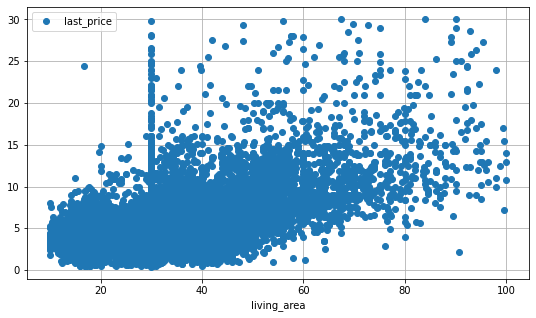

In [94]:
data.plot(
    x='living_area', 
    y='last_price',
    style='o',
    grid=True,
    figsize=(9, 5)
)

In [95]:
data['living_area'].corr(data['last_price'])

0.6066557945333716

В целом, за исключением редких выбросов и аномалий, динамика роста общей стоимости квартир аналогична, но менее наглядно выражена по сравнению с общей площадью квартиры (коэффициент корреляции в данном случае составил около 61 %): увеличение жилой площади приводит к увеличению полной стоимости объекта недвижимости.

Можно ли прийти к аналогичным выводам, рассматривая, как зависит общая стоимость квартир от площади кухни? Проверим:

<AxesSubplot:xlabel='kitchen_area'>

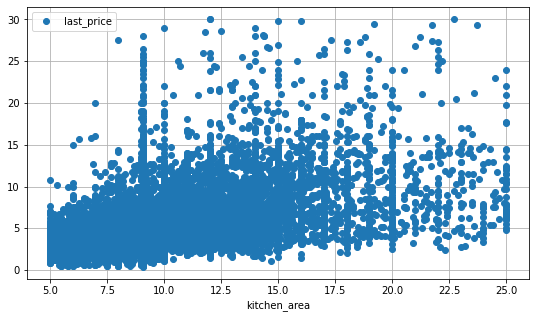

In [96]:
data.plot(
    x='kitchen_area', 
    y='last_price',
    style='o',
    grid=True,
    figsize=(9, 5)
)

In [97]:
data['kitchen_area'].corr(data['last_price'])

0.5099631110373989

Действительно, наблюдаемая картина в общих чертах повторяет предыдущие графики зависимости полной стоимости квартиры от общей площади и от жилой площади, однако коэффициент корреляции здесь едва превысил 50%, что говорит практически об отсутствии линейной зависимости.

В целом, подводя промежуточный итог зависимости общей стоимости квартиры от показателей площади, можно заключить, что чем выше площадь квартиры (или её части), тем выше общая стоимость квартиры.

Теперь изучим, как влияет количество комнат на полную стоимость объекта недвижимости. Рассмотрим средние значения общей стоимости комнат в зависимости от количества комнат:

<AxesSubplot:xlabel='rooms'>

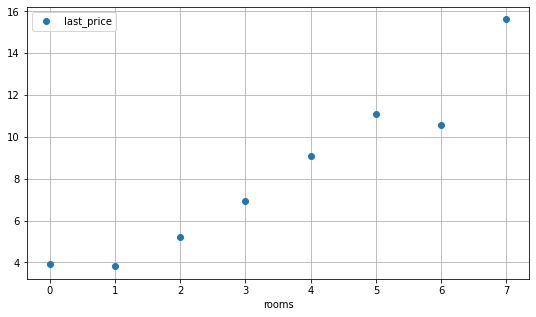

In [98]:
data.pivot_table(index='rooms', values='last_price').plot(
    style='o',
    grid=True,
    figsize=(9, 5)
)

Тенденция к росту средней полной стоимости квартиры с ростом количества комнат очевидна практически на всём исследуемом промежутке, что также объясняется тем, что чем больше в квартире комнат, тем, как правило, больше её общая площадь, а значит, и полная стоимость. Однако 6-комнатные квартиры имеют в среднем меньшую стоимость, чем 5-комнатные, что вероятно, объясняется их небольшим количеством:

In [99]:
data.query('rooms == 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqm,weekday_exp,month_exp,year_exp,floor_type,city_centers_dist_km
106,9,10.50,124.1,2017-05-25,5,3.20,4,79.4,3,False,...,384.0,0,0.0,6,84609.19,3,5,2017,другой,6.0
495,1,10.40,104.0,2015-09-20,5,3.50,6,70.0,4,False,...,637.0,1,145.0,702,100000.00,6,9,2015,другой,2.0
535,16,12.50,130.0,2017-11-17,5,3.00,7,82.0,5,False,...,167.0,0,0.0,90,96153.85,4,11,2017,другой,9.0
542,8,1.75,40.0,2016-04-28,5,2.65,5,28.6,1,False,...,0.0,0,0.0,127,43750.00,3,4,2016,первый,0.0
653,0,27.25,169.0,2014-12-09,5,2.65,12,89.0,9,False,...,0.0,1,69.0,594,161242.60,1,12,2014,другой,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22254,3,10.20,150.0,2017-03-07,5,3.40,3,95.0,3,False,...,549.0,1,698.0,384,68000.00,1,3,2017,последний,4.0
22798,11,8.10,110.0,2018-11-10,5,2.65,5,30.0,1,False,...,0.0,0,0.0,25,73636.36,5,11,2018,первый,31.0
23305,9,4.95,67.0,2018-10-29,5,2.60,5,51.2,1,False,...,0.0,0,0.0,89,73880.60,0,10,2018,первый,12.0
23427,10,7.60,104.0,2017-11-28,5,2.87,7,69.0,7,False,...,261.0,1,569.0,74,73076.92,1,11,2017,последний,4.0


In [100]:
data.query('rooms == 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqm,weekday_exp,month_exp,year_exp,floor_type,city_centers_dist_km
201,5,10.88,123.1,2015-11-12,6,3.20,5,89.0,2,False,...,516.0,0,0.0,992,88383.43,3,11,2015,другой,3.0
2017,1,9.10,111.0,2017-07-04,6,2.75,3,84.5,3,False,...,588.0,1,54.0,61,81981.98,1,7,2017,последний,2.0
3324,1,9.20,138.0,2016-03-22,6,2.65,5,77.6,2,False,...,311.0,0,0.0,672,66666.67,1,3,2016,другой,5.0
10763,4,13.00,154.1,2018-02-06,6,2.65,5,30.0,2,False,...,461.0,2,641.0,90,84360.80,1,2,2018,другой,2.0
14649,11,12.99,106.0,2018-07-08,6,2.65,4,30.0,1,False,...,0.0,1,361.0,90,122547.17,6,7,2018,первый,4.0
18548,19,11.70,119.0,2018-08-27,6,3.00,10,86.2,3,False,...,86.0,1,590.0,204,98319.33,0,8,2018,другой,10.0
21218,0,9.00,125.7,2018-03-21,6,2.55,15,73.6,15,False,...,0.0,0,0.0,60,71599.05,2,3,2018,последний,13.0
22122,7,8.50,128.3,2016-06-28,6,2.65,9,81.9,2,False,...,0.0,0,0.0,553,66250.97,1,6,2016,другой,0.0


In [101]:
data.query('rooms == 7')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqm,weekday_exp,month_exp,year_exp,floor_type,city_centers_dist_km
855,18,15.00,134.0,2017-10-27,7,2.65,4,88.0,3,False,...,803.0,1,387.0,150,111940.30,4,10,2017,другой,4.0
14603,12,13.49,100.6,2018-07-31,7,2.65,4,30.0,2,True,...,574.0,3,325.0,50,134095.43,1,7,2018,другой,4.0
17991,19,12.00,125.0,2017-02-09,7,3.30,6,82.0,5,False,...,407.0,0,0.0,138,96000.00,3,2,2017,другой,5.0
22264,20,22.00,141.0,2019-01-24,7,2.65,5,84.0,2,False,...,447.0,1,468.0,90,156028.37,3,1,2019,другой,3.0


Действительно, квартир с 6 и 7 комнатами всего 8 и 4, соответственно, в то время как 5-комнатных квартир - 127.

In [102]:
data['rooms'].corr(data['last_price'])

0.46416818879543764

В то же время при изучении всех значений полной стоимости квартиры линейная зависимость не наблюдается: коэффициент корреляции составил около 46.5 %.

Далее изучим, как тип этажа влияет на полную стоимость квартиры. Для этого, по аналогии с предыдущим случаем, посчитаем средние стоимости квартир в зависимости от типа этажа и построим график:

<AxesSubplot:xlabel='floor_type'>

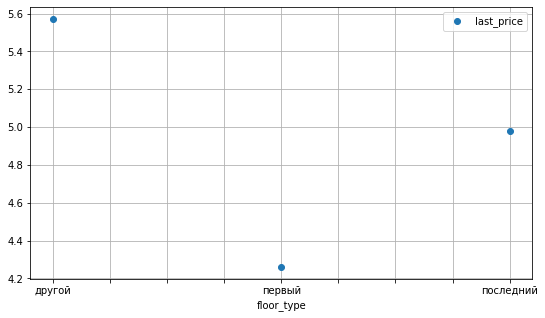

In [103]:
data.pivot_table(index='floor_type', values='last_price').plot(
    style='o',
    grid=True,
    figsize=(9,5),
)

Из представленных графиков видно, что самые недорогие квартиры расположены на первом этаже - их средняя стоимость несколько превышает 4.2 миллиона, что является нормальным и обусловлено меньшей привлекательностью таких квартир вследствие очевидных минусов: относительно низкая безопасность, близость подвальных помещений и др.

Квартиры на последнем этаже дешевле: их стоимость примерно на 0.6 миллиона ниже, чем для квартир на других этажах (кроме первого). Это, вероятно, вызвано тем, что квартиры на последних этажах, как и на первых, также имеют ряд недостатков, среди которых можно как правило выделить такие: протечка крыши, необходимость наличия лифта, слабый напор водоснабжения и др.

Далее рассмотрим, как неделя, месяц и год размещения объявления влияют на полную, общую стоимость квартир. Сделаем расчёты средних значений и построим графики:

<AxesSubplot:xlabel='weekday_exp'>

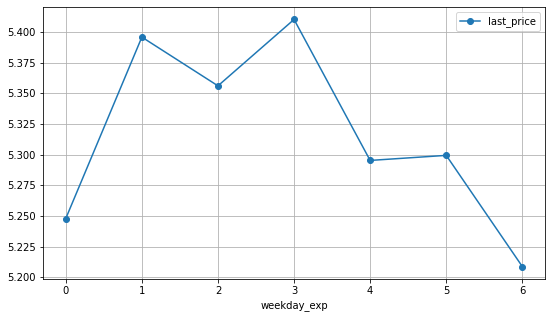

In [104]:
data.pivot_table(index='weekday_exp', values='last_price').plot(
    style='-o',
    grid=True,
    figsize=(9,5)
)

Как можно видеть, наиболее дорогие квартиры, т.е. имеющие среднюю стоимость более 5.3 миллионов, размещаются в будни дни: со вторника по четверг включительно. А в начале и в конце недели средняя стоимость снижается до уровня 5.2 - 5.3 миллионов. Это может объясняться тем, что покупательская активность в эти дни выше, чем в середине рабочей недели, так как покупатели имеют возможность просмотра интересующего объекта недвижимости. А это значит, что может осуществляться больше сделок купли-продажи и цены могут снижаться вследствие торга.

Теперь посмотрим, как влияет месяц размещения объявления на её общую стоимость:

<AxesSubplot:xlabel='month_exp'>

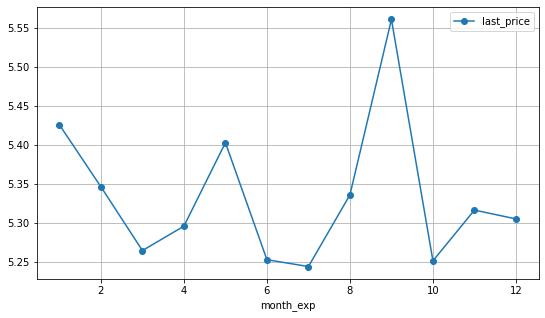

In [105]:
data.pivot_table(index='month_exp', values='last_price').plot(
    style='-o',
    grid=True,
    figsize=(9, 5)
)

В течение года средняя полная стоимость объектов недвижимости колеблется в промежутке между 5.2 и 5.6 миллионами, при этом имея волнообразный характер. 

Так, в первом полугодии средняя стоимость сначала снижается с примерно 5.42 (в январе) до приблизительно 5.27 миллиона (в марте), после чего происхожит резкий рост до 5.40 миллионов в мае, а затем резкое падение до примерно 5.25 в июне. Такое поведение цен, вероятно, можно объяснить снижением спроса на жильё в конце зимы - начале лета вследствие больших трат перед новым годом, желанием приобрести квартиру в конце весны, чтобы сделать ремонт в тёплое время года и уходом в отпуск многих потенциальных клиентов в начале лета. 

Во втором полугодии стоимость объектов недвижимости начинает постепенно расти, сначала достигнув минимума в июле - менее 5.25. миллиона, а затем резко увеличиваясь до максимума в сентябре - выше 5.55 миллиона. Затем происходит её резкое снижение в октябре до 5.25 миллиона с последующей корректировкой стоимости на уровне 5.3 миллиона в последние несколько месяцев года. Это может быть обусловлено увеличением покупательской активности в августе-сентябре в связи с необходимостью обеспечения жильём студентов/аспирантов, начавших обучение; а в ноябре-декабре рост средней полной стоимости квартир по всей видимости вызван небольшим предновогодним ажиотажем покупателей, желающих приобрести новое жильё до конца года.

И, наконец, изучим, как год размещения объявления о продаже квартиры влияет на её общую стоимость:

<AxesSubplot:xlabel='year_exp'>

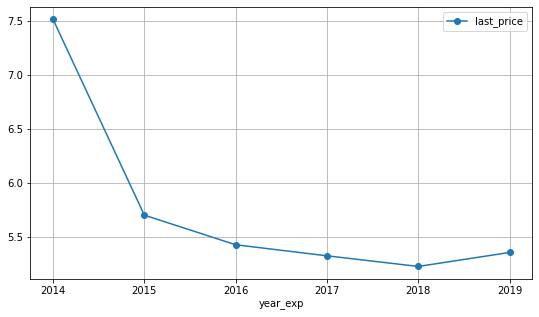

In [106]:
data.pivot_table(index='year_exp', values='last_price').plot(
    style='-o',
    grid=True,
    figsize=(9, 5)
)

Как можно видеть, более с 2014 по 2018 год происходило резкое снижение средней общей стоимости объектов недвижимости с более чем 7.5 до примерно 5.2 миллионов, затем наблюдался небольшой рост до приблизительно 5.3 миллиона в 2019 году.

Чтобы понять, почему так происходило, построим сводную таблицу с изменением средней цены квартиры и средней площади в зависимости от года продажи:

In [107]:
data.pivot_table(index='year_exp', values=['last_price', 'total_area'], aggfunc=['count', 'mean'])

count                  mean           
         last_price total_area last_price total_area
year_exp                                            
2014             61         61   7.516014  74.387541
2015            812        812   5.704394  60.419483
2016           2376       2376   5.430290  57.630623
2017           7093       7093   5.328070  56.287412
2018           6648       6648   5.229642  54.524460
2019            965        965   5.358962  51.838124

Как можно видеть, средняя общая площадь квартиры на всём исследуемом временном промежутке снизилась с примерно 74.4 до 51.8 квадратных метров. При этом количество объявлений росло: с 61 в 2014 году до 7093 в 2017 года, однако затем оно начало снижаться: сначала до 6648 в 2018 году, а затем резко в 2019 году - их число снизилось до 965. 

Именно поэтому, в 2018 гг. средняя стоимость квартир достигла минимума, после чего начался её рост. Это может также объясняться тем, что в 2014 году на фоне внешнеполитической нестабильности и роста зарубежных валют цены размещаемых для продажи квартир стали высокими, после чего, для поддержания прежних темпов продаж они снижались до определённого уровня, чтобы затем снова начать рост, видимо, обусловленный снижением предложения или ростом спроса на объекты недвижимости. Причём снижение средней площади квартир и увеличение количества объявлений может быть вызвано ростом темпов ввода в эксплуатацию нового жилья на фоне восстановления экономики после 2014 года.

Таким образом, можно заключить следующее: все исследованные в этой части параметры оказывают влияние на общую (полную) стоимость объекта недвижимости.

В частности, больше всего влияют площадь как всей квартиры, так и её частей (жилой или кухни): наблюдается прямая зависимость между этими показателями и общей стоимостью квартиры. Аналогичным образом можно сказать и о количестве комнат.

Также этаж расположения объекта недвижимости влияет на его полную стоимость: крайние этажи (первые и последние) снижают стоимость квартиры.

И наконец, время размещения (день недели, месяц и год) объявления о продаже квартиры оказывает влияние на стоимость квартиры: наиболее выгодны приобретать квартиру было в воскресенье, в июне, в 2018 году.

4. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Для этого построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. 

In [108]:
pivot_1 = data.pivot_table(index='locality_name', values='price_sqm', aggfunc=['count','mean'])
pivot_1.columns = ['Количество объявлений', 'Средняя цена квадратного метра']
pivot_1.sort_values(by='Количество объявлений', ascending=False).head(10)

,Количество объявлений,Средняя цена квадратного метра
locality_name,,
Санкт-Петербург,11871,107072.692147
Мурино,440,84471.754477
Шушары,386,77413.376554
Кудрово,361,93371.080111
Всеволожск,307,68259.998046
Колпино,294,74674.755782
Парголово,283,89252.389152
Пушкин,270,101616.774407
Гатчина,250,67744.346680


<AxesSubplot:ylabel='locality_name'>

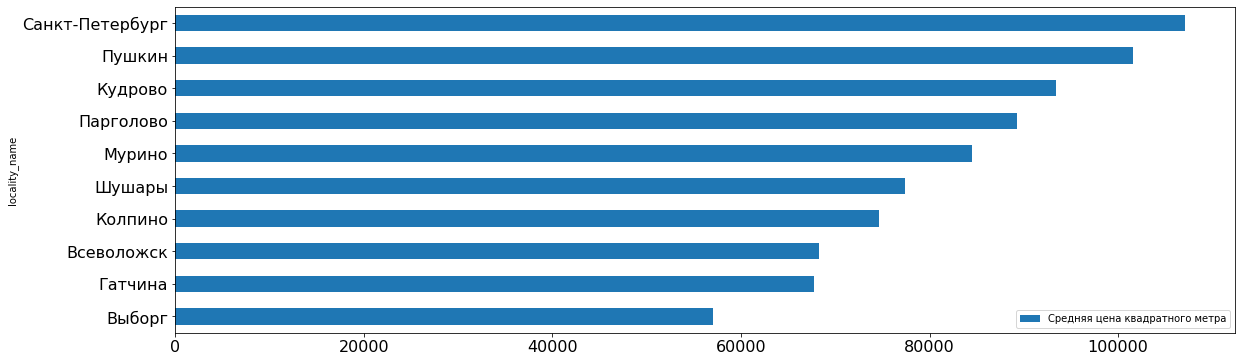

In [109]:
pivot_1.sort_values(by='Количество объявлений', ascending=False).head(10)['Средняя цена квадратного метра'].sort_values().plot(kind = 'barh', figsize = (19,6), legend = True, fontsize = 16)    

Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра:

Так, наиболее дорогая недвижимость стоимостью более 107 тысяч за 1 квадратный метр продаётся в городе Санкт-Петербург, здесь же представлено наибольшее количество объявлений о продаже - около 12 тысяч. Это логично, т.к. второй по величине и значимости город России является наиболее привлекательным местом для жизни и работы среди всех представленных в данном анализе населённых пунктов.

В то же время самая низкая стоимость квадратного метра (около 57 тысяч) среди перечисленных выше населённых пунктов отмечена для Выборга, находящегося довольно далеко от Санкт-Петербурга. Вероятно, это объясняется тем, что данный город, имеет менее развитую инфраструктуру, удалён от Санкт-Петербурга больше, чем остальные представленные здесь населённые пункты, и соответственно, менее привлекателен для потенциальных покупателей.

5. Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра с помощью методов query() и pivot_Table():

In [110]:
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_dist_km', values='last_price')

,last_price
city_centers_dist_km,
0.0,7.905485
1.0,10.303840
2.0,9.385290
3.0,8.598790
4.0,9.215863
5.0,9.662947
6.0,8.535217
7.0,8.432562
8.0,7.995568


Опишем, как стоимость объектов зависит от расстояния до центра города — построим график изменения средней цены для каждого километра от центра Петербурга:

<AxesSubplot:xlabel='city_centers_dist_km'>

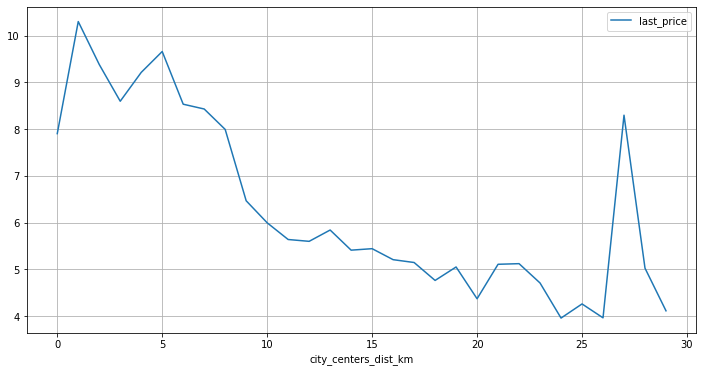

In [111]:
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_dist_km', values='last_price').plot(
    style='-',
    grid=True,
    figsize=(12, 6)
)

Как можно видеть, по мере удаления от центра Санкт-Петербурга, средние значения общей стоимости объектов недвижимости сначала резко, от 0 до 9 км, а затем более плавно, с 9 до 27 км, снижаются с приблизительно 8 миллионов (0 км) до примерно 4 миллионов (26 км), при этом в промежутке между 27 и 28 км происходит резкий скачок средней стоимости квартиры до примерно 8 миллионов, вероятно обусловленный расположением на этом рассстоянии от центра города довольно дорогих современных объектов недвижимости. Проверим это:

In [112]:
data.query('locality_name == "Санкт-Петербург" and city_centers_dist_km == 27.0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqm,weekday_exp,month_exp,year_exp,floor_type,city_centers_dist_km
748,13,14.35,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,1496.0,0,0.0,128,193918.92,1,11,2017,другой,27.0
5961,6,2.25,32.0,2018-02-27,1,2.65,2,16.5,2,False,...,0.0,0,0.0,178,70312.50,1,2,2018,последний,27.0


In [113]:
data.query('locality_name == "Санкт-Петербург" and city_centers_dist_km == 28.0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqm,weekday_exp,month_exp,year_exp,floor_type,city_centers_dist_km
814,0,7.600,111.0,2017-07-26,3,3.00,16,63.0,12,False,...,185.0,2,72.0,66,68468.47,2,7,2017,другой,28.0
1111,0,4.072,38.0,2015-10-14,1,2.65,5,16.0,4,False,...,0.0,0,0.0,285,107157.89,2,10,2015,другой,28.0
9572,0,3.413,43.0,2015-11-10,1,2.65,5,18.0,1,False,...,0.0,0,0.0,258,79372.09,1,11,2015,первый,28.0
17798,0,4.990,71.0,2015-10-14,3,2.65,5,42.0,1,False,...,0.0,0,0.0,285,70281.69,2,10,2015,первый,28.0
18941,0,3.666,39.0,2015-11-09,1,2.65,5,16.0,2,False,...,0.0,0,0.0,259,94000.00,0,11,2015,другой,28.0
22916,0,5.144,64.0,2015-10-14,2,2.65,5,33.0,5,False,...,0.0,0,0.0,285,80375.00,2,10,2015,последний,28.0
23145,17,6.300,92.0,2017-07-20,3,2.65,16,46.0,7,False,...,36.0,2,46.0,14,68478.26,3,7,2017,другой,28.0


В срезе для 27 и 28 км оказалось всего 2 и 7 квартиры, что явно не даёт адекватной картины для стоимости квартир на 27-м и 28-м километре, значит, их можно удалить из рассмотрения, создав для этого отдельную переменную data_spb:

<AxesSubplot:xlabel='city_centers_dist_km'>

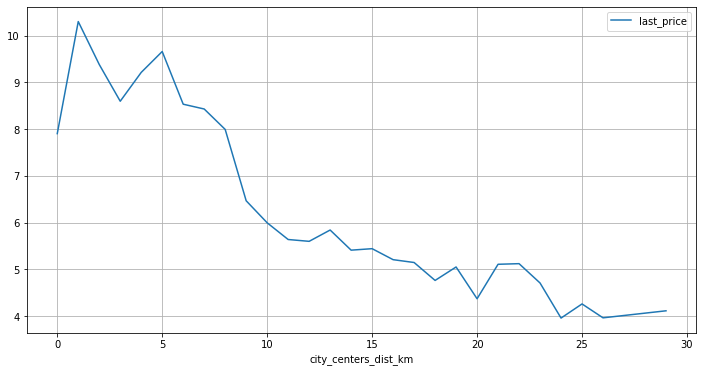

In [114]:
data_spb = data.query('locality_name == "Санкт-Петербург" and city_centers_dist_km != 27.0')
data_spb = data_spb.query('locality_name == "Санкт-Петербург" and city_centers_dist_km != 28.0')

data_spb.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_dist_km', values='last_price').plot(
    style='-',
    grid=True,
    figsize=(12, 6)
)

Теперь посмотрим, почему на 3-м км квартиры несколько дешевле, чем на 5-м км от центра Санкт-Петербурга. Для этого посмотрим на количество квартир разных категорий в зависимости от типа этажа (столбец 'floor_type'): 

count        205
unique         3
top       другой
freq         119
Name: floor_type, dtype: object


<AxesSubplot:>

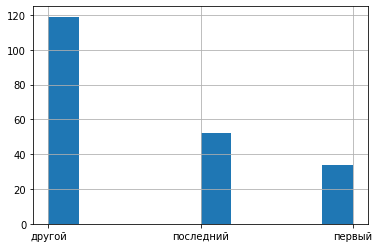

In [115]:
print(data.query('locality_name == "Санкт-Петербург" and city_centers_dist_km == 3.0')['floor_type'].describe())

data.query('locality_name == "Санкт-Петербург" and city_centers_dist_km == 3.0')['floor_type'].hist()

In [116]:
len(data.query('locality_name == "Санкт-Петербург" and city_centers_dist_km == 3.0 and floor_type == "другой"')) / \
len(data.query('locality_name == "Санкт-Петербург" and city_centers_dist_km == 3.0'))

0.5804878048780487

count        586
unique         3
top       другой
freq         453
Name: floor_type, dtype: object


<AxesSubplot:>

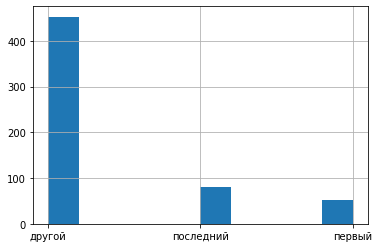

In [117]:
print(data.query('locality_name == "Санкт-Петербург" and city_centers_dist_km == 5.0')['floor_type'].describe())
data.query('locality_name == "Санкт-Петербург" and city_centers_dist_km == 5.0')['floor_type'].hist()

In [118]:
len(data.query('locality_name == "Санкт-Петербург" and city_centers_dist_km == 5.0 and floor_type == "другой"')) / \
len(data.query('locality_name == "Санкт-Петербург" and city_centers_dist_km == 5.0'))

0.773037542662116

Как можно видеть, на 3-м километре более привлекательных квартир, т.е. расположенных не на крайних этажах (первом и последнем) немного меньше, чем на 5-м километре: 58 % против 77 %. Поэтому, стоимость таких разноудалённых от центра города квартир несколько отличается.

В целом наблюдаемую тенденцию можно объяснить снижением доступности современной городской инфраструктуры по мере удаления от центра города и, как следствие, снижением привлекательности и средней стоимости продаваемых квартир.

### Общий вывод

Таким образом, для анализа были получены данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.

Необходимо было научиться определять рыночную стоимость объектов недвижимости. 

Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

В таблице с входными данными представлена информация о 23699 объектах недвижимости, распределённая по следующим 22 столбцам:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении


Предобработка данных для анализа происходила следующим образом. Во входных данных в 14 из 22 столбцов присутствовали пропуски, которые были почти во всех столбцах заполнены. Далее в 6 столбцах нужно было изменить тип данных в соответствии с представленными в них величинами. Затем обрабатывался столбец с названиями населённых пунктов: удалялись неявные дубликаты.

На следующем этапе в таблицу с исходными данными добавлялись новые столбцы со следующими параметрами:
- цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах.


В ходе исследовательского анализа необходимо было выполнить 5 заданий:

1.	Изучить перечисленные ниже параметры объектов и построить отдельные гистограммы для каждого из этих параметров.
Список параметров:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка.

2.	Изучить, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 

3.	Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучить, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

4.	Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — построить сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.

5.	Выделить квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислить среднюю цену каждого километра. Описать, как стоимость объектов зависит от расстояния до центра города — построить график изменения средней цены для каждого километра от центра Петербурга.



В результате выполнения этих заданий можно заключить следующее:

1. Типичная квартира для продажи в Санкт-Петербурге и соседних населённых пунктах выглядит следющим образом:
- общая площадь - от 30 до 50 квадратных метров;
- жилая площадь - от 15-20 до 30 квадратных метров;
- площадь кухни - от 5 до 10 квадратных метров;
- цена объекта - от 2.5 до 5 миллионов;
- количество комнат - не более 3;
- высота потолков - 2.65 м;
- тип этажа квартиры («первый», «последний», «другой») - «другой»;
- общее количество этажей в доме - 5 или 9;
- расстояние до центра города в метрах - 10000-20000 м;
- расстояние до ближайшего парка - примерно 500 м.

2. В целом типичный срок продажи квартиры составляет 45 дней, причём быстрыми продажи можно считать осуществлённые ранее этого времени, а необычно долгими - в течение более 1021 дня.

3. Все изученные параметры влияют на общую (полную) стоимость объекта недвижимости. В частности, наблюдается высокая степерь прямой зависимость между площадью всей квартиры и общей стоимостью квартиры. Этаж расположения объекта недвижимости тоже оказывает влияние на его полную стоимость: квартиры на крайних этажах (первые и последние) являются более доступными вариантами. Время размещения (день недели, месяц и год) объявления о продаже квартиры также влияет на стоимость квартиры: наиболее выгодны приобретать квартиру было в воскресенье, в июле, в 2018 году.

4. Среди 10 населённых пунктов с наибольшим числом объявлений наиболее дорогая недвижимость представлена в городе Санкт-Петербург, а наиболее доступная - в Выборге.

5. В целом по мере удаления от центра Санкт-Петербурга снижается доступность современной городской инфраструктуры и, как следствие, сниженается привлекательность и средняя стоимость продаваемых квартир.